<a href="https://colab.research.google.com/github/A01706648/TC3006C_Deliver/blob/main/CleanData/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
isInKaggle = False

for dirname, _, filenames in os.walk('/kaggle/input'):
    if(not isInKaggle):
        if(len(filenames) > 0):
            isInKaggle = True
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
if(not isInKaggle):
  print('not in the Kaggle, we are going to load google drive for the file')

not in the Kaggle, we are going to load google drive for the file


In [24]:
# Visualization 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import missingno as msno 

In [4]:
if(not isInKaggle):
  from google.colab import drive
  drive.mount("/content/gdrive") 
  %cd "/content/gdrive/MyDrive/Machine Learning/deliver/CleanData/titanic/"
  df_train = pd.read_csv('train.csv')
  df_test = pd.read_csv('test.csv')
else:
  df_train = pd.read_csv('/kaggle/input/titanic/train.csv')  
  df_test = pd.read_csv('/kaggle/input/titanic/test.csv')  

Mounted at /content/gdrive
/content/gdrive/MyDrive/Machine Learning/deliver/CleanData/titanic


To understand the Train data and Test data,

we will need to check what is exactly in the train data and test data, and what the data type of each data.

Sometimes we need to transform some data type to some easier datatype like datetime.

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We will need to check the box plot of the data, to see if there is any outlier data in the Train Data or Test Data.

If there is the outlier data,
we need to replace it with the mean value of Train Data if outlier is in Train Data, 

or replace it with mean value of Test Data with mean value of Test Data.

In order to keep the mean value and Test Data and Train Data the same

In [10]:
px.box(df_train, x='Survived', y='Fare', title='Fare for Surived in train')

In [13]:
px.box(df_test, y='Fare', title='Fare in test')

In [8]:
df_train[df_train['Fare'] > 300].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [10]:
df_test[df_test['Fare'] > 300].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


We notice that there are 4 passengers is with Fare Value 512.3292, which is a outlier of the fare, since rest of the passengers' fare are all below 300.

So we are going to replace their fare value to the mean of their data set.

In order to make the prediction more general.

In [14]:
test_fare_mean = df_test['Fare'].mean()
train_fare_mean = df_train['Fare'].mean()

df_train["Fare"].replace({ 512.3292 : train_fare_mean}, inplace=True)
df_test["Fare"].replace({ 512.3292 : train_fare_mean}, inplace=True)

In this part, we are going to remove the Na value.

We get the summery of the Na value for both test and train data.


We noticed that there are 17% Age Value missing in Train,
and 9.7% Age Value missing in Test.

It means the Age Value are still usable.

We will use the mean value of the Age in Test or Train to replace the missing age value in Test or Train.

In order to keep the mean value of each Data Set still the same.

We also noticed that there are 87% Cabin value is not available in train,
and 78% Cabine value is missing in test.

So it is better to discard the cabine value, since there are too much missing, and we are not able to use it for prediction

in the same time, we notice there are 1 Fare value missing in test.

We will replace it with the mean value of the the Fare in test.
By that, it will keep the mean value the same in test.

In addtion, we found there are 2 Embarded Data missing in Train Data,
We will use the default value to replace it.

In [21]:
test_num = df_test.shape[0]
train_num = df_train.shape[0]
print('there are test sample ' + str(test_num) + ', train sample ' + str(train_num))

there are test sample 418, train sample 891


In [22]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

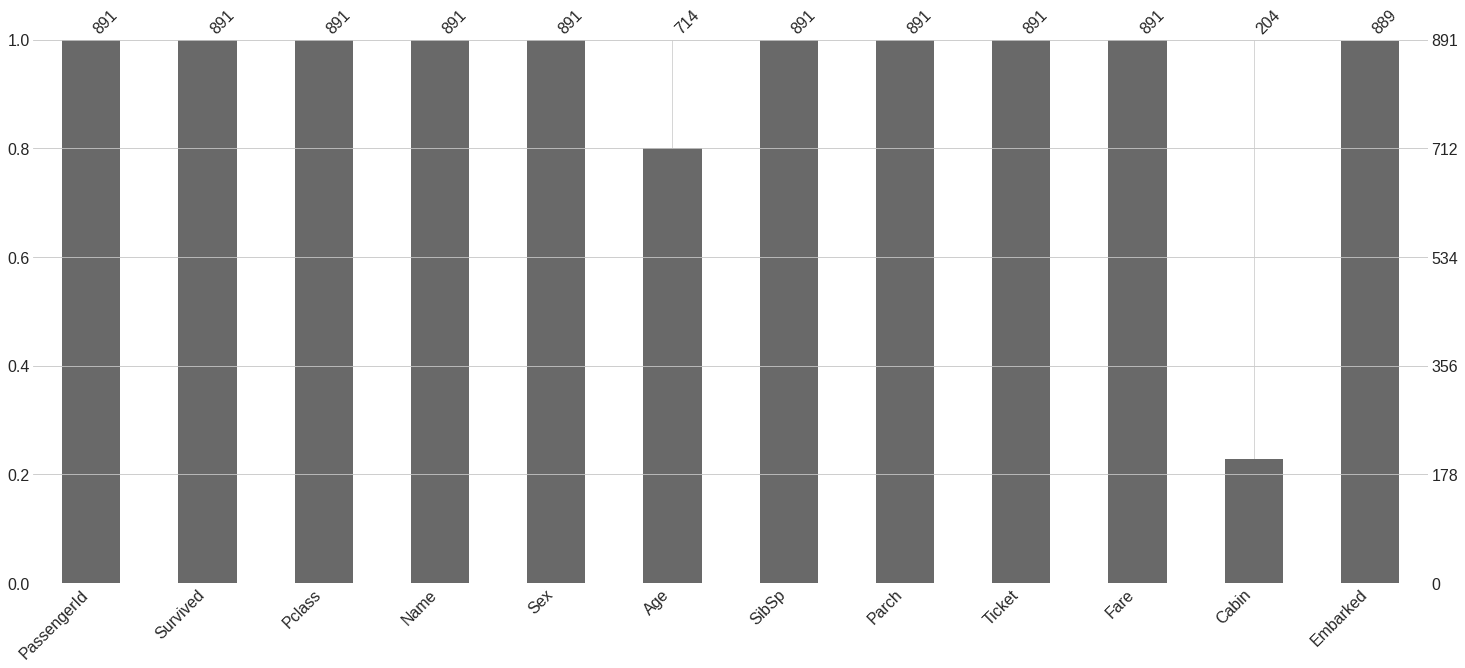

In [25]:
msno.bar(df_train)

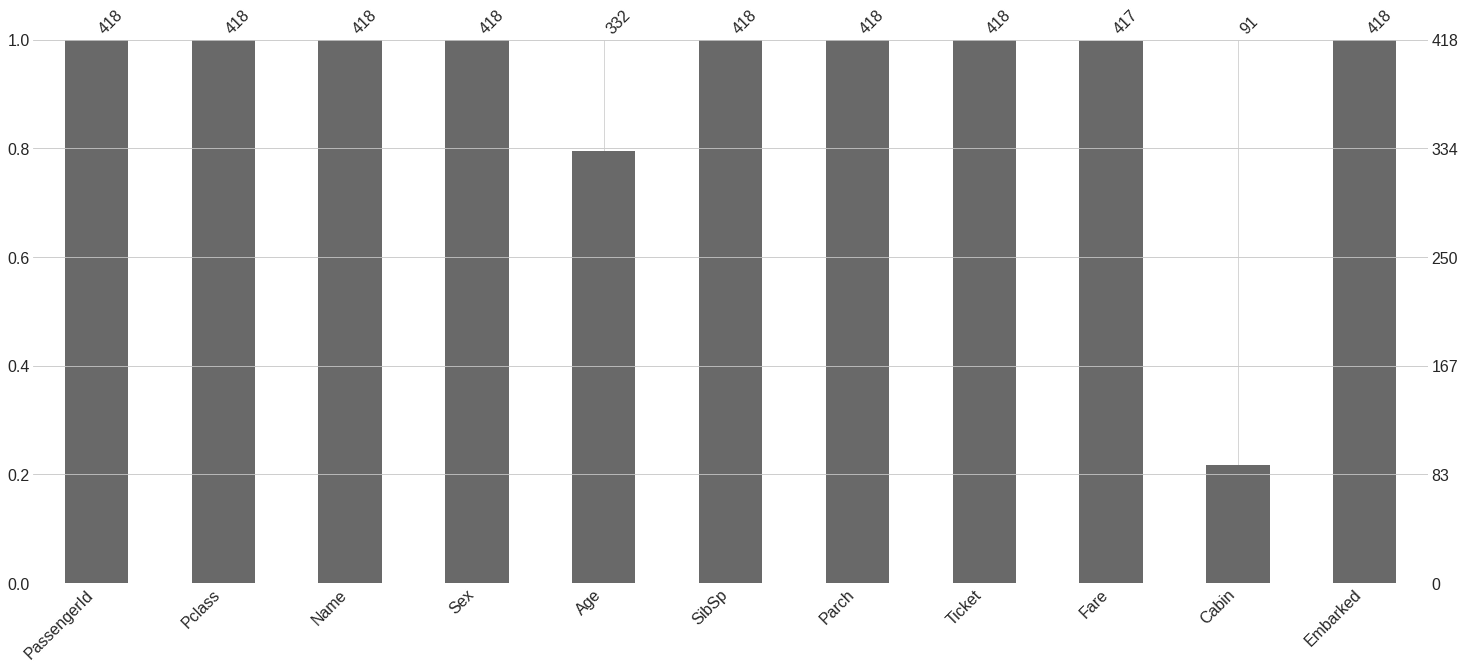

In [26]:
msno.bar(df_test)

In [27]:
#replace the missing age value with the mean value of its dataset
train_age_mean = df_train['Age'].mean()
test_age_mean = df_test['Age'].mean()

df_train['Age'].replace({np.nan: train_age_mean}, inplace=True)
df_test['Age'].replace({np.nan: test_age_mean}, inplace=True)

In [28]:
#drop the cabin column
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [35]:
#replace the missing Fare Value in Test
df_test['Fare'].replace({np.nan: test_fare_mean}, inplace=True)

In [36]:
#replace missing embarked value with default value
df_train['Embarked'].replace({np.nan: 'Q'}, inplace=True)

In [38]:
#check the current missing
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64